# Puneethkrishna_DSFT8_MINI_PROJECT_3

## &#10148;Problem Statement </br> 
### <div class="alert alert-info">Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern, spending pattern, shopping score, salary etc. The reason for these clusters is to help identify those customers who would be interested in certain products, offers and services. This helps in creating a win-win situation for both the store (in terms of revenue and more customers through customer recommendation) and the customer (discounts, offers, reward points, gifts, etc).</div>

## &#10148; Requried Libraries</br>

In [1]:
import pandas as pd                                                # Working with dataframe and series
import numpy as np                                                 # Working with numpy arrays
import matplotlib.pyplot as plt                                    # Visualization library
import seaborn as sns                                              # Visualization library
from sklearn.preprocessing import LabelEncoder                     # For converting cat to num
import warnings
warnings.filterwarnings('ignore')                                  # To avoide the warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler     # For scaling purpose
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.facecolor':'lightblue'})                       # plots background highlight
from sklearn.decomposition import PCA                              # Type of data extraction
from sklearn.cluster import KMeans                                 # Unsupervised algorithm
from sklearn.metrics import silhouette_samples, silhouette_score   # evaluation tool
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

## &#10148; Data import and checking some information about data features</br>

In [2]:
df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Copy of the dataset
C_df = df.drop(['CustomerID'], axis = 1).copy(deep = True)

In [4]:
# Structure of the dataset
C_df.shape

(200, 4)

In [5]:
# Information of the dataset features
C_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
# Statistical information of the dataset features
C_df.describe([.95, .99])

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
50%,36.000000,61.500000,50.000000
95%,66.050000,103.000000,92.000000
99%,69.010000,126.110000,97.010000
max,70.000000,137.000000,99.000000


## &#10148; Exploratory Data Analysis</br>

In [7]:
C_df['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [8]:
C_df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

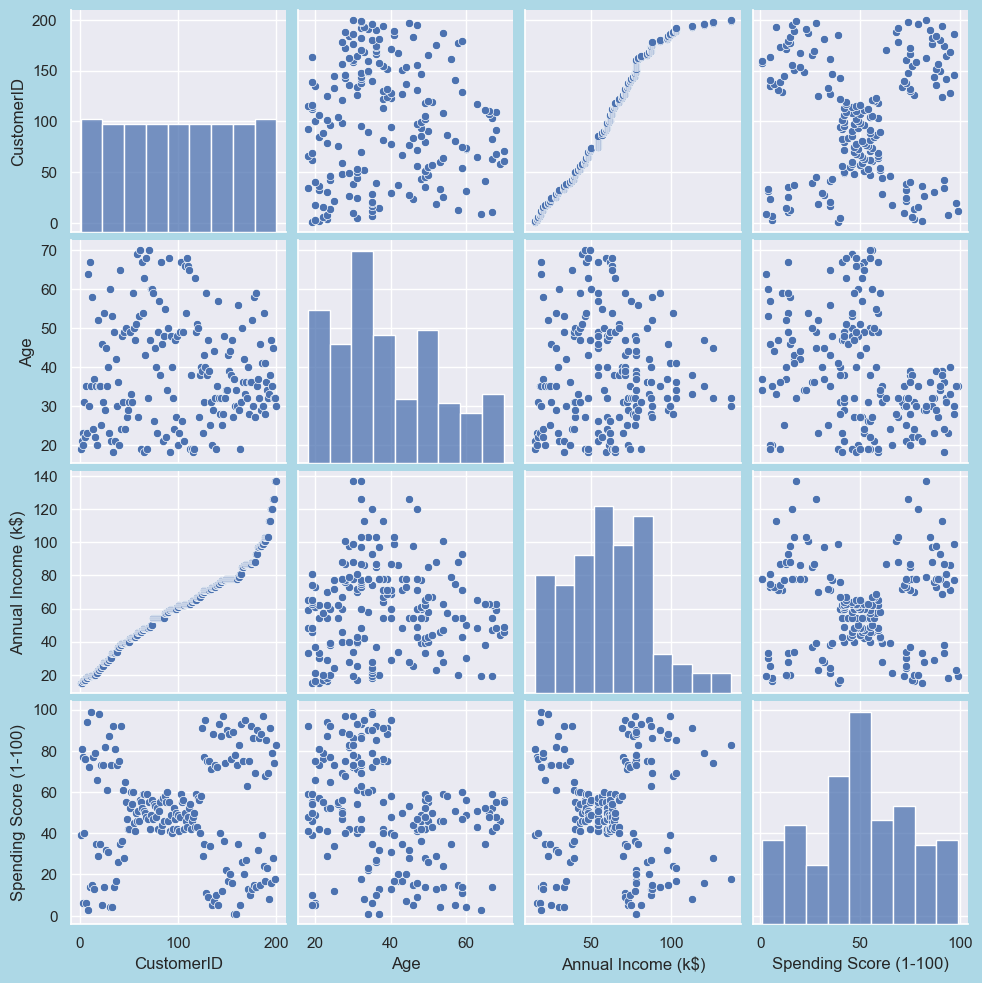

In [9]:
sns.pairplot(df, kind='scatter')
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above pair plot we can see how the numerical columns are related to each other and we can see that some groups are present between the features**</div>

In [10]:
c = C_df.select_dtypes(include = 'object')
n = C_df.select_dtypes(exclude = 'object')

In [49]:
t = 1
plt.figure(figsize = (25, 6))
for i in n.columns:
    plt.subplot(1, 3, t)
    sns.boxplot(C_df[i], palette = 'bright')
    plt.title(i, fontsize = 16)
    t = t + 1

### <div class="alert alert-info">Interpretation
**- From the above box plot we can see there is no outliers present in he dataset and we can see the distribution of the features**</div>

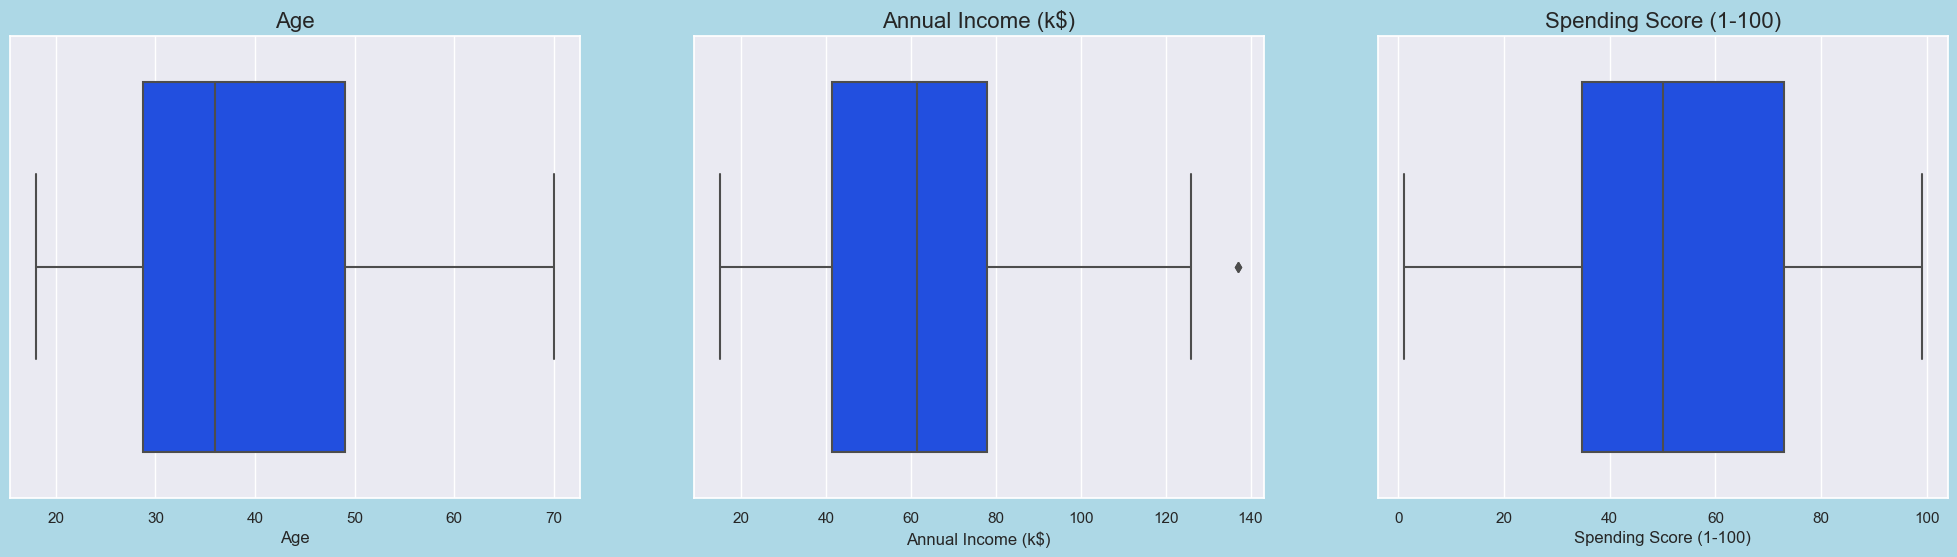

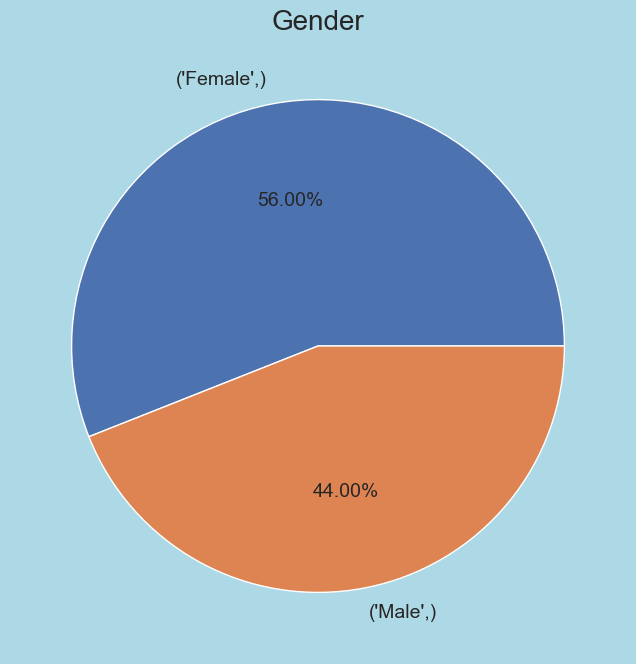

In [12]:
plt.figure(figsize=(15, 8))
plt.pie(c.value_counts(), labels = c.value_counts().index, autopct = '%0.2f%%', textprops={'fontsize': 14})
plt.title('Gender', fontsize=20)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above pie chart we can see that male proportion is slightly higher than female**</div>

In [13]:
C_df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [14]:
t = 1
plt.figure(figsize=(25, 28))
for i in n.columns:
    plt.subplot(5, 3, t)
    sns.boxplot(y = df[i], x = df['Gender'], palette = 'bright')
    plt.title(i, fontsize = 16)
    t = t + 1

### <div class="alert alert-info">Interpretation
**- From the above box plot we can see that the annual income and the age is more in male and the spending score is more in female**</div>

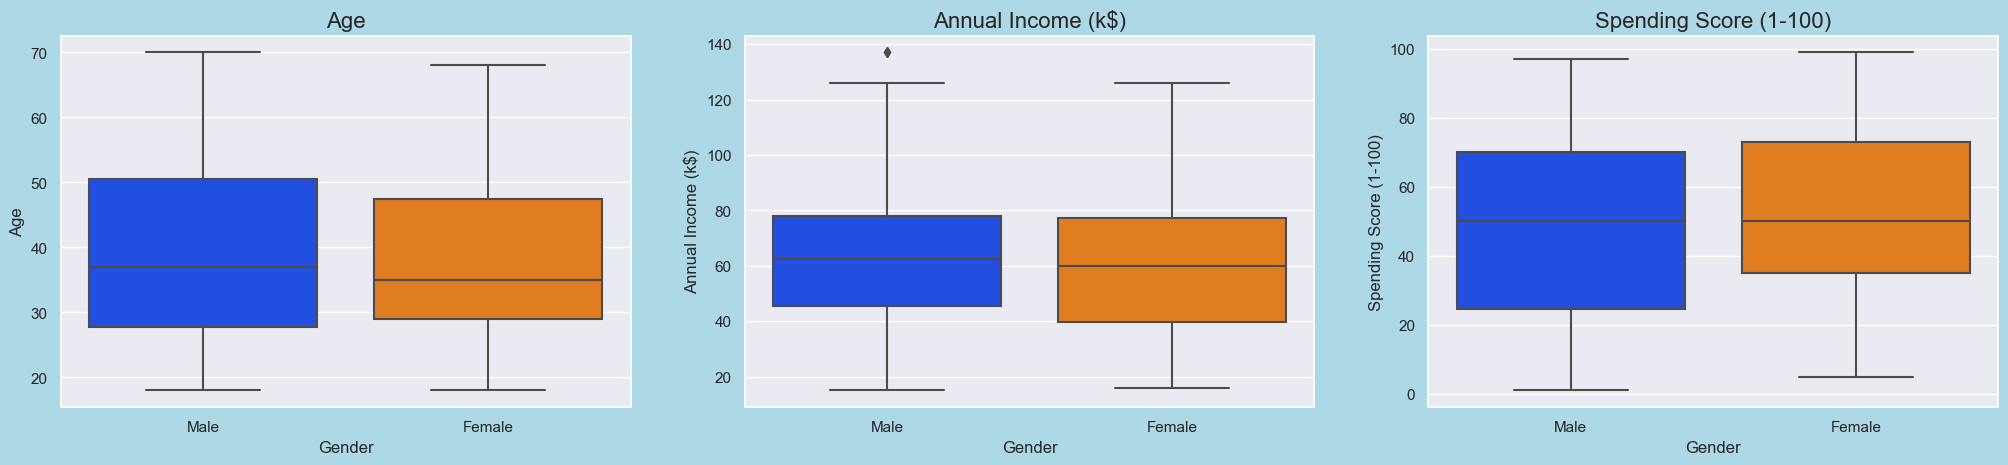

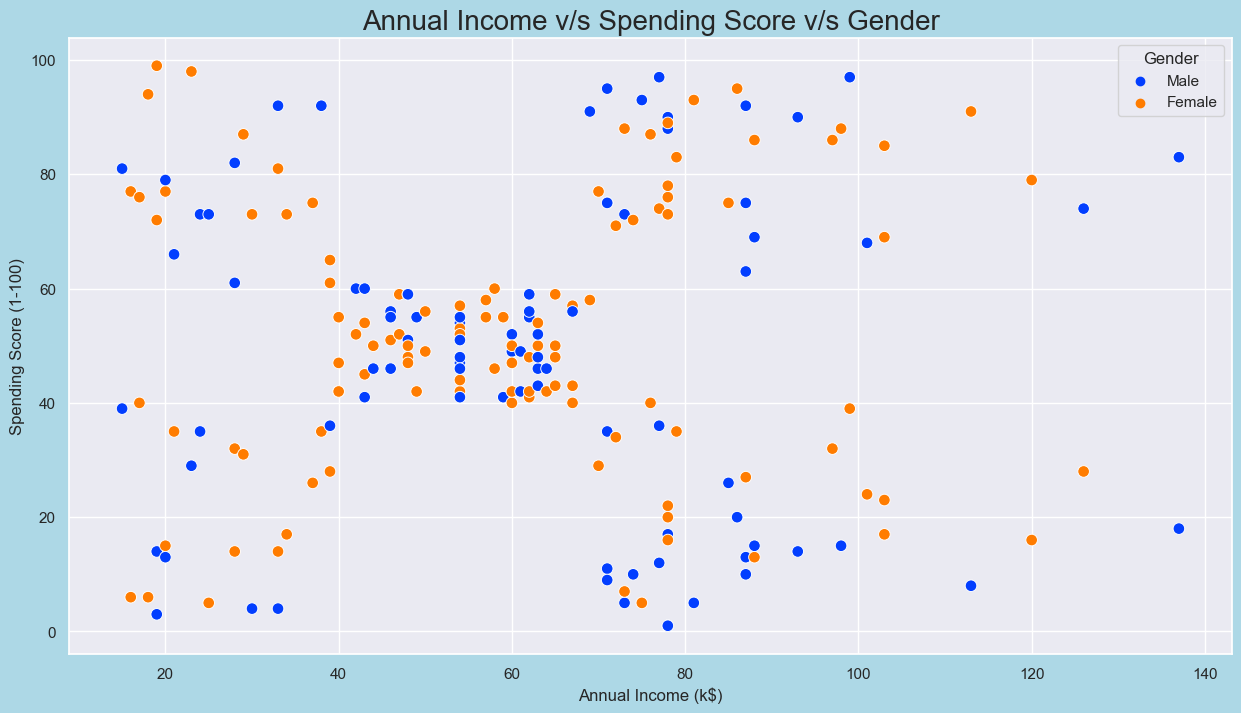

In [15]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = C_df['Annual Income (k$)'], y = C_df['Spending Score (1-100)'], s = 70, hue =C_df['Gender'], palette = 'bright' )
plt.title('Annual Income v/s Spending Score v/s Gender', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above scatter plot we can see that the gender is equally distributed throug annual income and the number of customers are more in the annual income range between 40 to 80k dollers**</div>

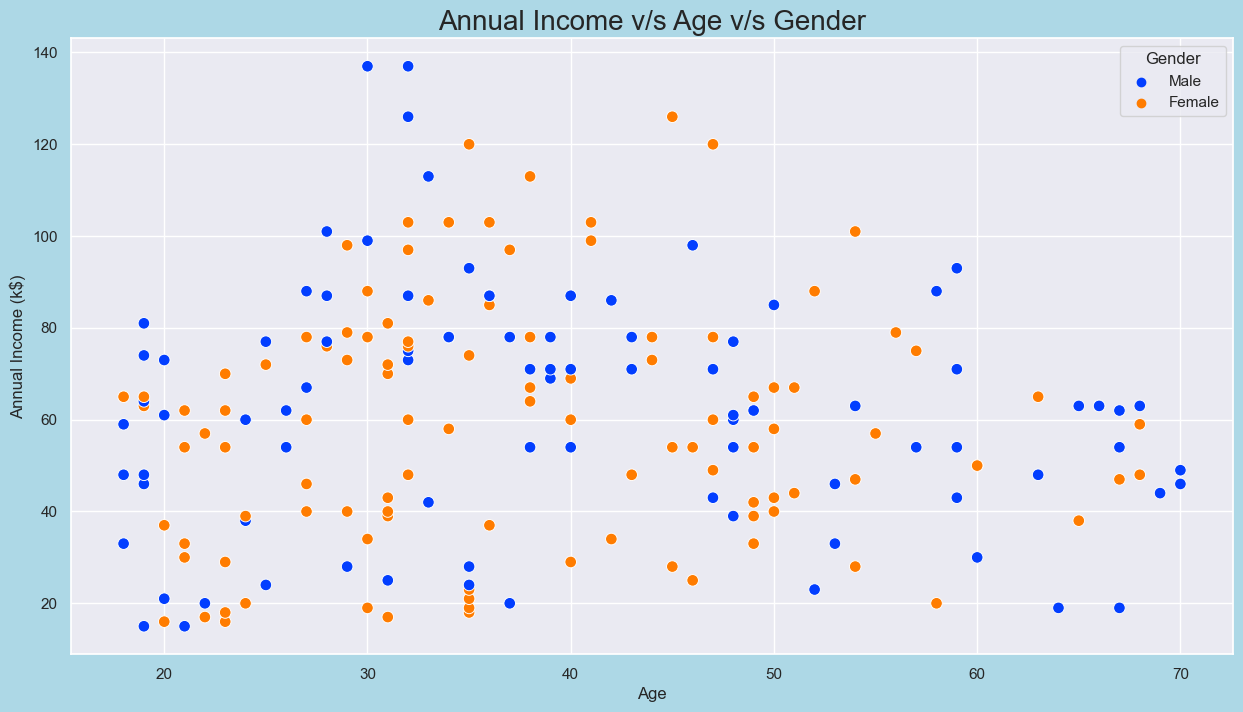

In [16]:
plt.figure(figsize = (15, 8))
sns.scatterplot(y = df['Annual Income (k$)'], x = df['Age'], s = 70, hue =df['Gender'], palette = 'bright' )
plt.title('Annual Income v/s Age v/s Gender', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above scatter plot we can see that the gender is equally distributed through annual income and the number of customers are decreases as the age increases and the aged customers are having less income**</div>

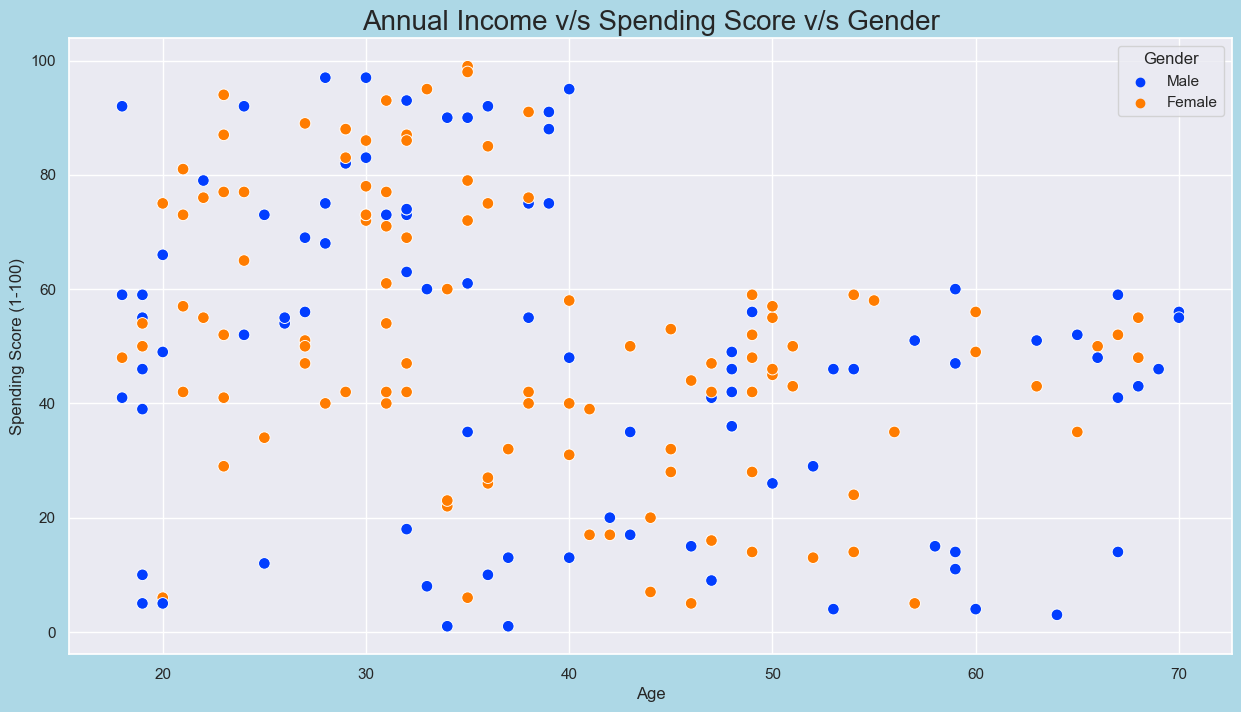

In [17]:
plt.figure(figsize = (15, 8))
sns.scatterplot(y = C_df['Spending Score (1-100)'], x = C_df['Age'], s = 70, hue =C_df['Gender'], palette = 'bright' )
plt.title('Annual Income v/s Spending Score v/s Gender', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above scatter plot we can see that the gender is equally distributed through annual income and the number of customers are decreases as the age increases and the aged customers are having less spending score**</div>

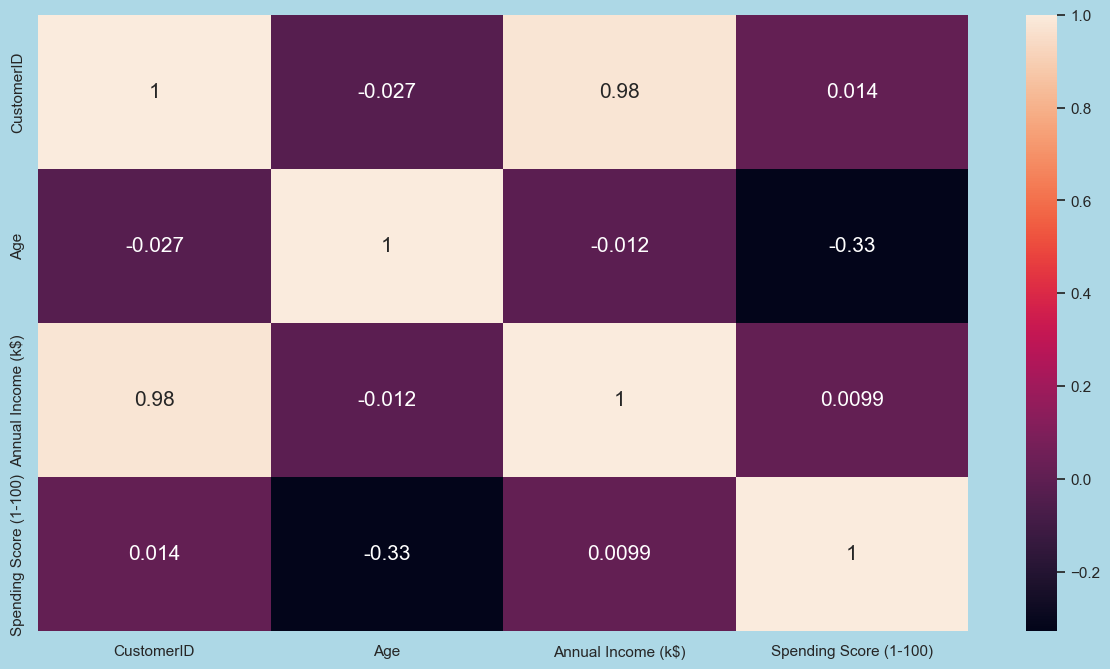

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, annot_kws={'size': 15})
plt.show()

### <div class="alert alert-info">Interpretation
**- From the heatmap we can see that the correlation between the features are less**</div>

## &#10148;  Data Preprocessing

### &#10148;  Feature Engineering
#### &#10148;  Feature Transformation

In [19]:
C_df['Gender'] = C_df['Gender'].astype('category')

In [20]:
C_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    category
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.1 KB


In [21]:
C_df['Gender'] = LabelEncoder().fit_transform(C_df['Gender'])

In [22]:
C_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#### &#10148;  Feature Scalling

## Here no need to do scaling beacause the range of features is not too far

#### &#10148;  Feature Reduction

In [23]:
pca = PCA(n_components = 2).fit_transform(C_df)
pca = np.array(pca)

## &#10148;  Build, Predict and evaluate the model

### <div class="alert alert-info">Observations of EDA
- **There is no any dependent columns present in the dataset**
- **From the data we can see some groups are available in the visualization**

### <div class="alert alert-info">Selection of algorithms
- **Based on the EDA observations we need to select unsupervised learning algorithm where there is no dependent feature in the dataset**
- **As the outliers are  not present in the features so any algorithm can be selected**

#### &#10148;  K-means Algorithm

In [24]:
X = C_df.values

In [25]:
distortion = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 10).fit(X)
    distortion.append(kmeans.inertia_)

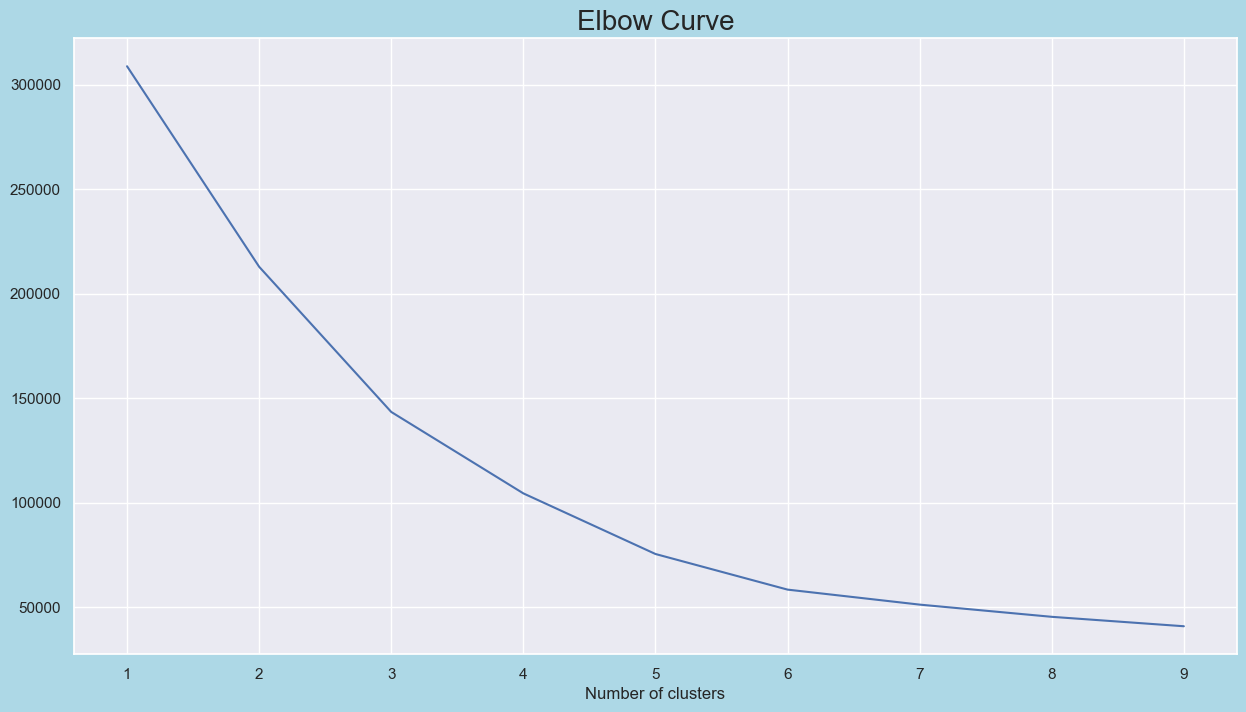

In [26]:
plt.figure(figsize=(15, 8))
plt.plot(range(1, 10), distortion)
plt.title('Elbow Curve', fontsize = 20)
plt.xlabel('Number of clusters')
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above vizualization at the k=5 the slope is more and the variation of the error is more so we can take k = 4 for the analysis**</div>

In [27]:
S = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, random_state = 10).fit(X)
    pred = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, pred)
    print("For n_clusters =", i,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.29307334005502633
For n_clusters = 3 The average silhouette_score is : 0.383798873822341
For n_clusters = 4 The average silhouette_score is : 0.4052954330641215
For n_clusters = 5 The average silhouette_score is : 0.4440669204743008
For n_clusters = 6 The average silhouette_score is : 0.45205475380756527
For n_clusters = 7 The average silhouette_score is : 0.43949619264530887
For n_clusters = 8 The average silhouette_score is : 0.4349105351263195
For n_clusters = 9 The average silhouette_score is : 0.4080555594955236
For n_clusters = 10 The average silhouette_score is : 0.3828606213726962
For n_clusters = 11 The average silhouette_score is : 0.36560749066167425
For n_clusters = 12 The average silhouette_score is : 0.35640244253976716
For n_clusters = 13 The average silhouette_score is : 0.3362594224885134
For n_clusters = 14 The average silhouette_score is : 0.3395080491088953


### <div class="alert alert-info">Interpretation
**- From the silhouette score we can take k = 5 it has good performance and the error is also less**</div>

In [28]:
model1 = KMeans(n_clusters = 5, random_state = 20).fit(X)
pred1 = model1.fit_predict(X)
centroids1 = model1.cluster_centers_
centers = np.array(model1.cluster_centers_)
centers

array([[ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

In [29]:
l = ['KMeans', 'Focus on this customers', 'Good_customers', '2nd Good_customers', 'Poor customers','college students' ]
a = ['KMeans', 'concentrate on customer satisfaction', 'Good_customers', '2nd Good_customers', 'Poor customers',  'college students']

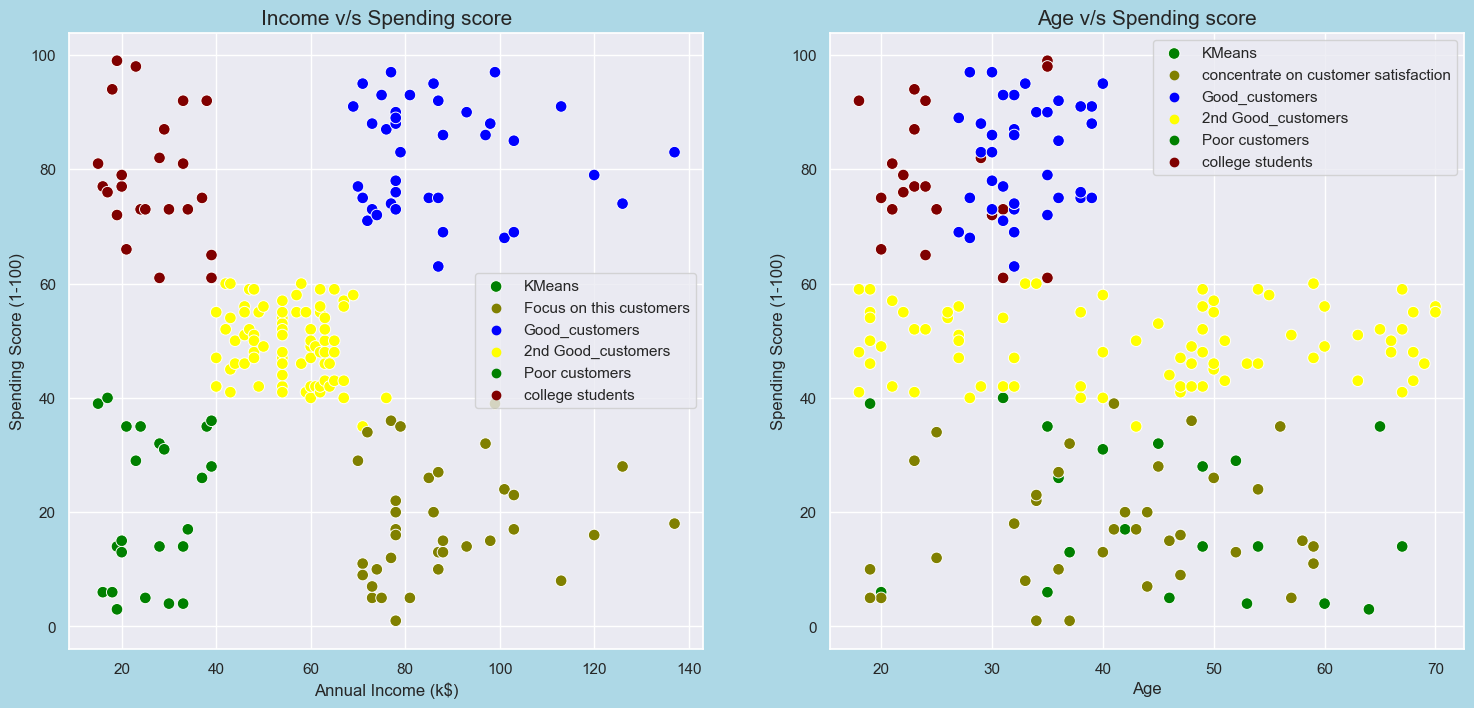

In [30]:
color1 = ["olive", "blue", "Yellow", "green", "maroon"]
plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = C_df['Annual Income (k$)'], y = C_df['Spending Score (1-100)'], s = 70, hue =pred1, palette = color1)
plt.legend(labels = l)
plt.title('Income v/s Spending score', fontsize = 15)

plt.subplot(1, 2, 2)
sns.scatterplot(x = C_df['Age'], y = C_df['Spending Score (1-100)'], s = 70, hue =pred1, palette = color1)
plt.legend(labels = a)
plt.title('Age v/s Spending score', fontsize = 15)
plt.show()

In [31]:
silhouette_avg1 = silhouette_score(X, pred1)
silhouette_avg1

0.4440669204743008

#### &#10148;  Hirarchical clustering Algorithm

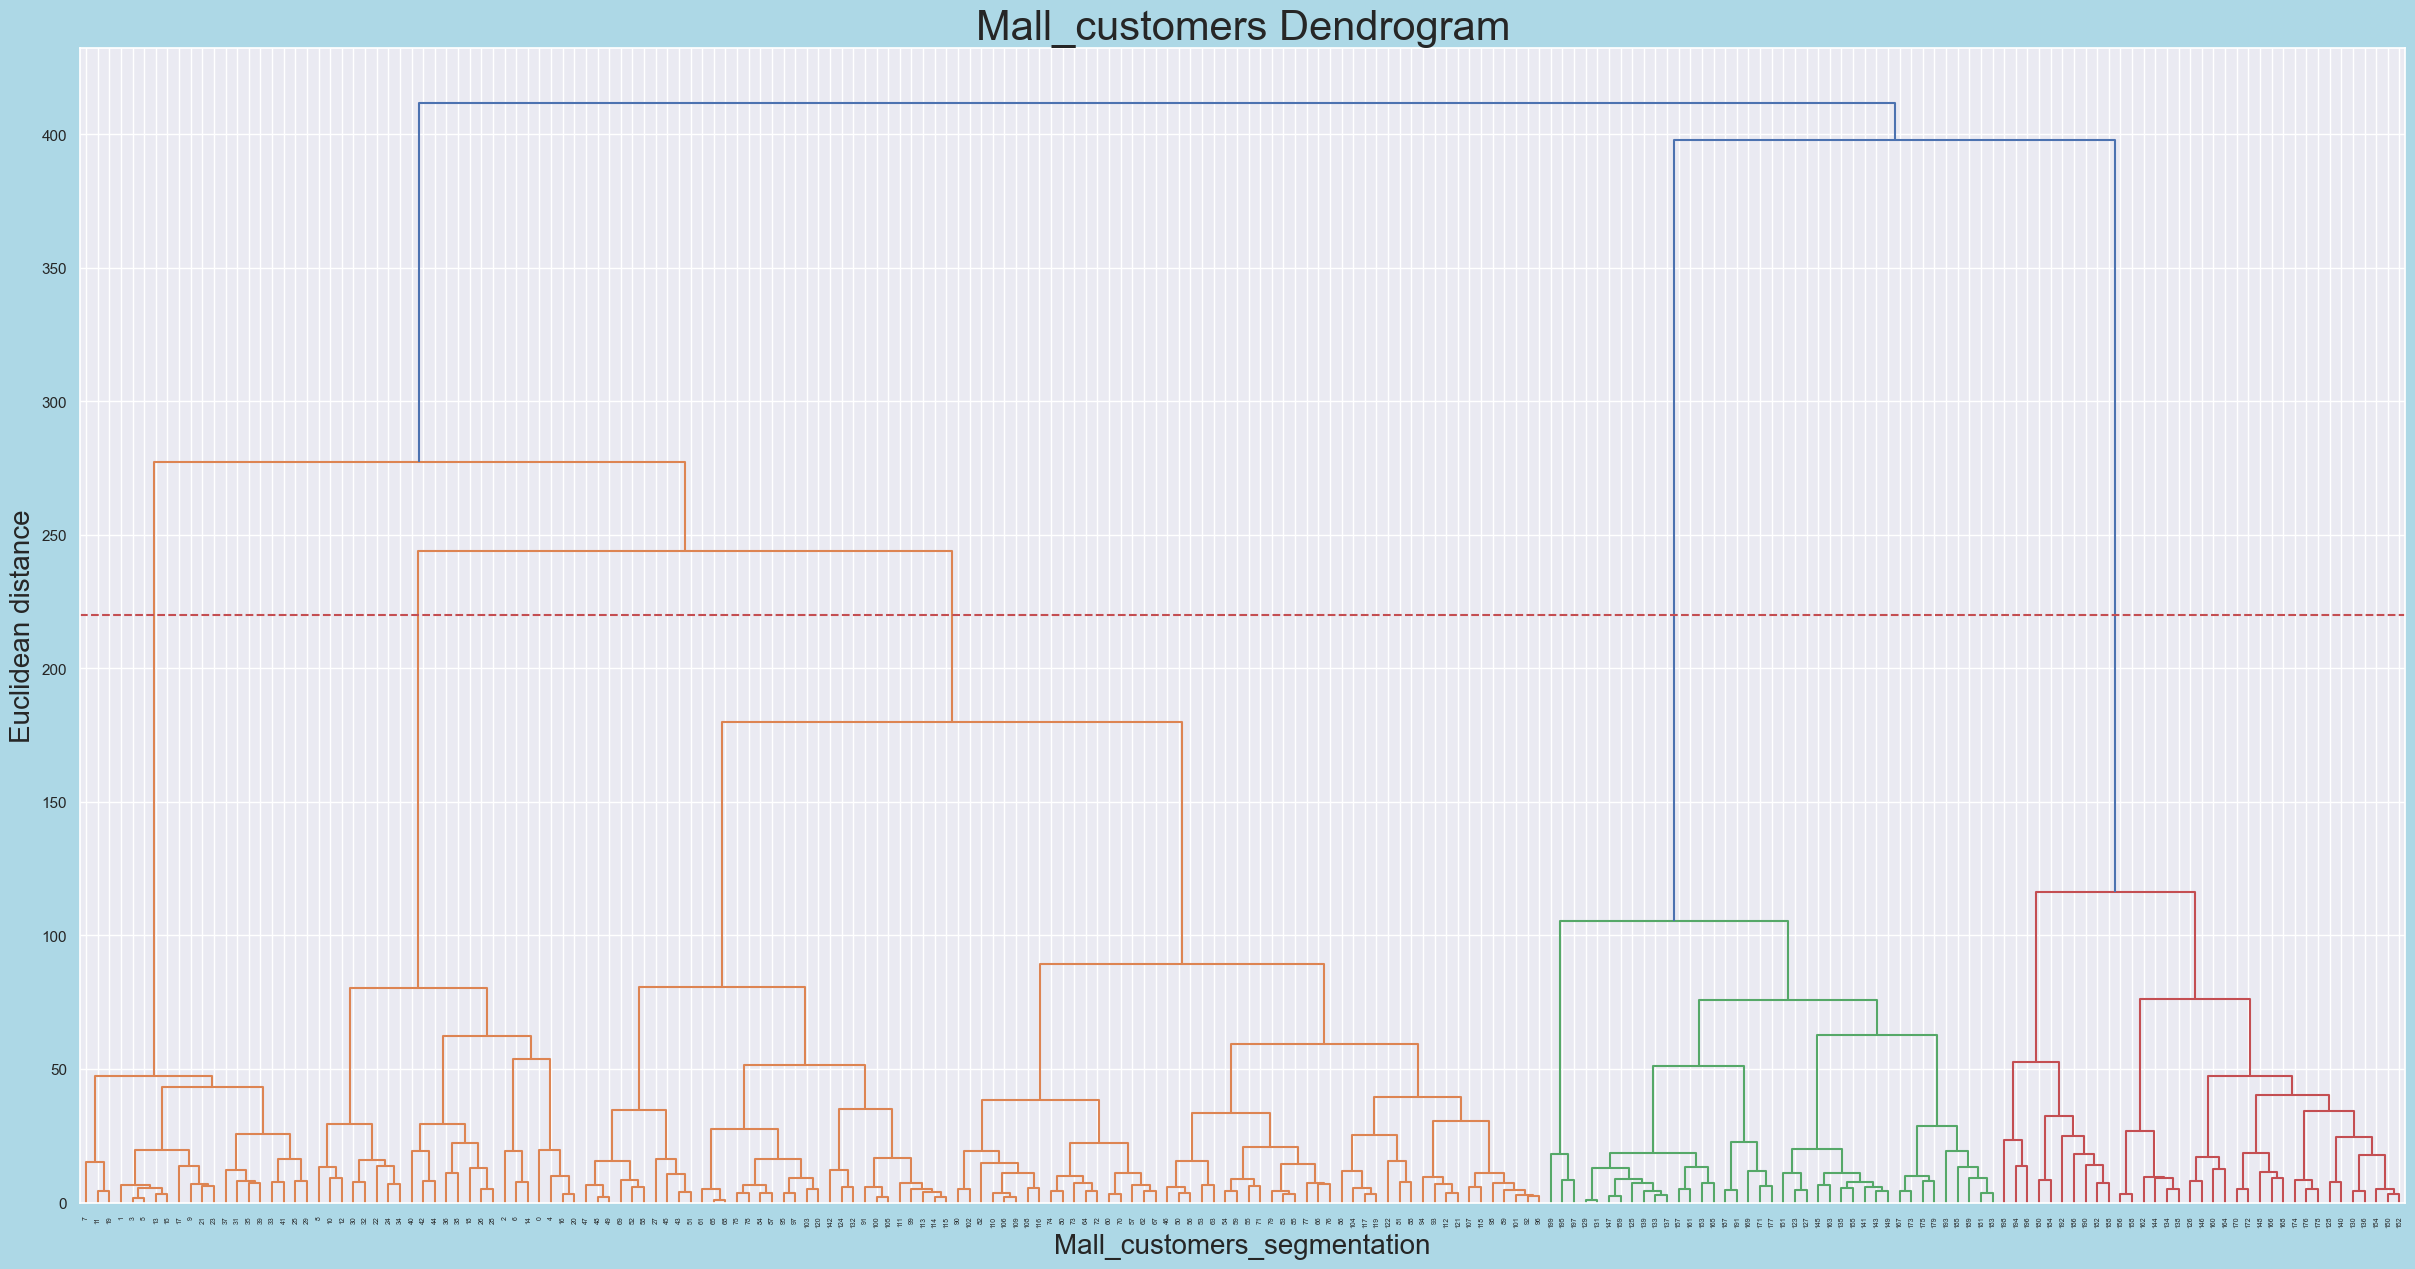

In [32]:
plt.figure(figsize = (30, 15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y = 220, color = 'r', linestyle = '--')
plt.title('Mall_customers Dendrogram',fontsize=30)
plt.xlabel('Mall_customers_segmentation',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the dendrogram using threshold value we can take the k = 5 for futher clustering process**</div>

In [33]:
model2 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
pred2 = model2.fit_predict(X)

In [34]:
l2 = ['Hirarchical', '2nd Good_customers', 'Focus on this customers', 'Good_customers', 'college students', 'Poor customers']
a2 = ['Hirarchical', '2nd Good_customers', 'concentrate on customer satisfaction', 'Good_customers', 'college students', 'Poor customers']

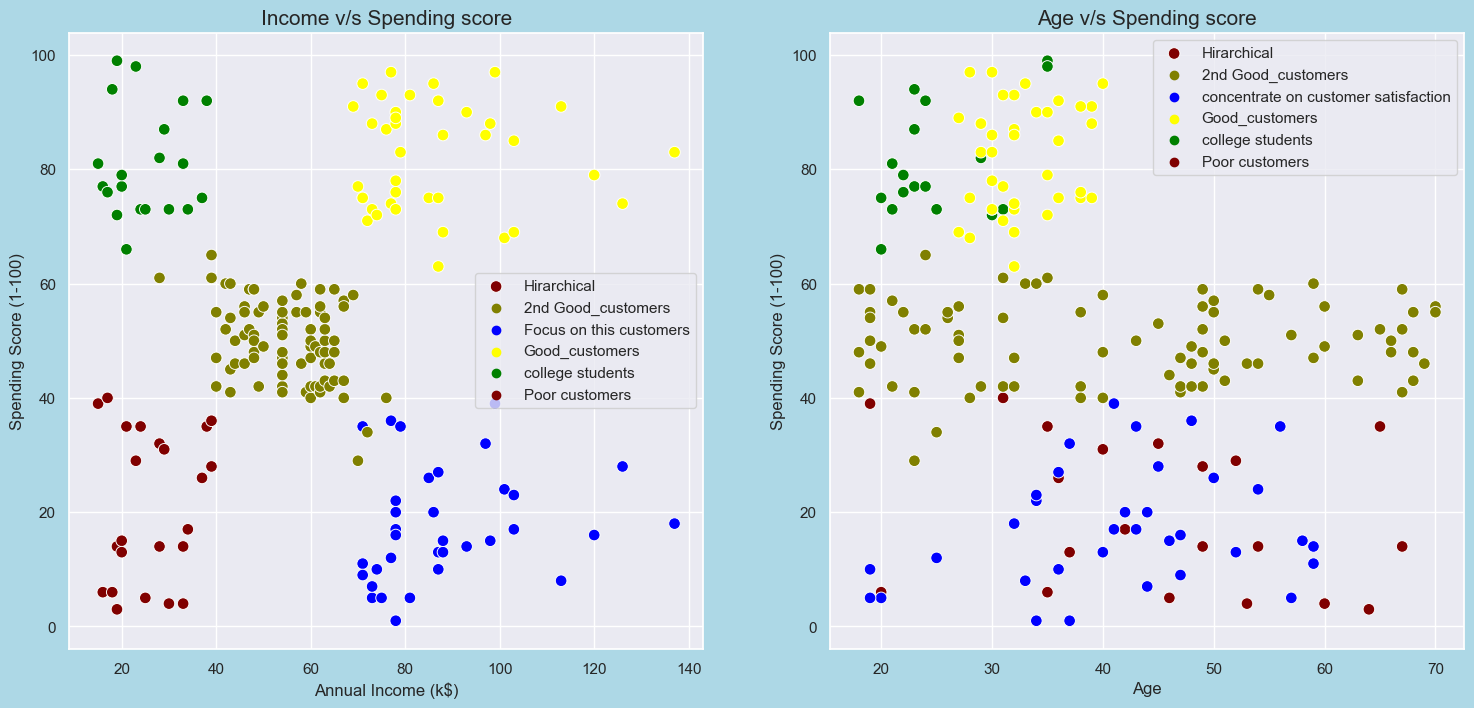

In [35]:
plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = C_df['Annual Income (k$)'], y = C_df['Spending Score (1-100)'], s = 70, hue =pred2, palette = color1)
plt.legend(labels = l2)
plt.title('Income v/s Spending score', fontsize = 15)

plt.subplot(1, 2, 2)
sns.scatterplot(x = C_df['Age'], y = C_df['Spending Score (1-100)'], s = 70, hue =pred2, palette = color1)
plt.legend(labels = a2)
plt.title('Age v/s Spending score', fontsize = 15)
plt.show()

In [36]:
silhouette_avg2 = silhouette_score(X, pred2)
silhouette_avg2

0.43997527212476695

#### &#10148;  DBSCAN Algorithm

In [37]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

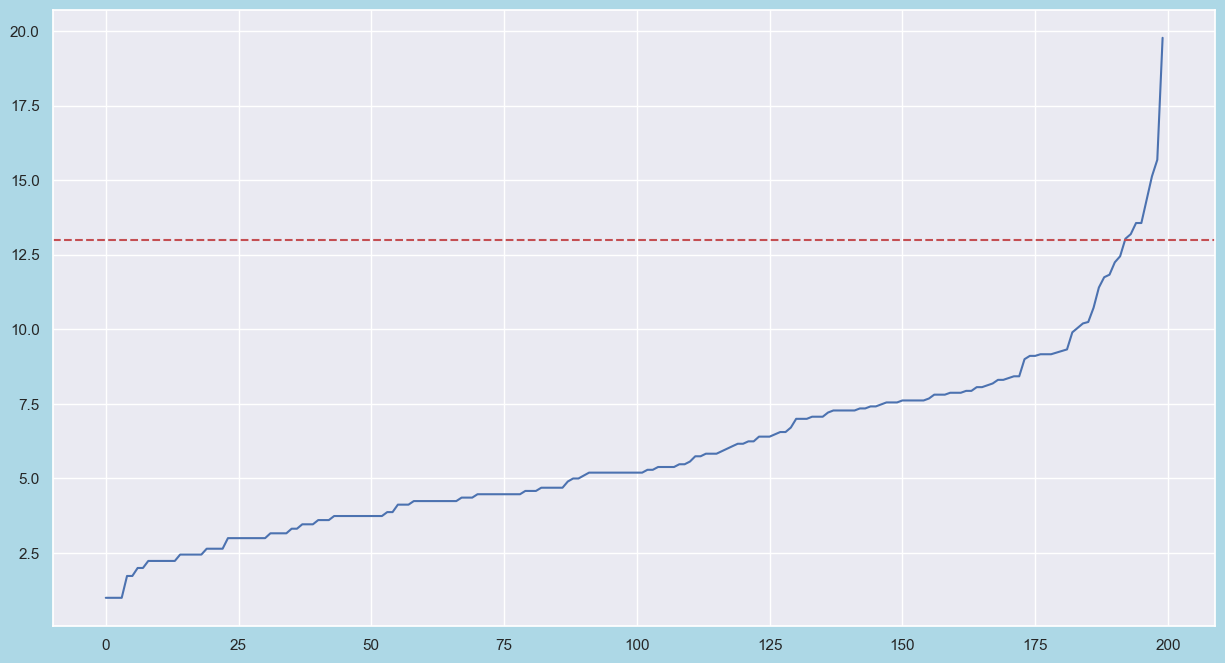

In [38]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=13, color='r', linestyle='--')
plt.show()

### <div class="alert alert-info">Interpretation
**- From the plot we can take the eps value as 13 and need to check the optimum min sample value using this eps value**</div>

In [39]:
eps = 12.95
for i in range(2, 50):
    db = DBSCAN(eps = eps, min_samples = i)
    labels = db.fit_predict(X)
    x= labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ',i , '| obtained clustering: ', results)

eps= 12.95 | min_samples=  2 | obtained clustering:  [(1, 8), (2, 146), (3, 2), (4, 2), (5, 34), (6, 4), (7, 2), (8, 2)]
eps= 12.95 | min_samples=  3 | obtained clustering:  [(1, 16), (2, 146), (3, 34), (4, 4)]
eps= 12.95 | min_samples=  4 | obtained clustering:  [(1, 17), (2, 113), (3, 8), (4, 34), (5, 24), (6, 4)]
eps= 12.95 | min_samples=  5 | obtained clustering:  [(1, 28), (2, 109), (3, 7), (4, 34), (5, 22)]
eps= 12.95 | min_samples=  6 | obtained clustering:  [(1, 35), (2, 107), (3, 6), (4, 33), (5, 19)]
eps= 12.95 | min_samples=  7 | obtained clustering:  [(1, 46), (2, 100), (3, 6), (4, 33), (5, 15)]
eps= 12.95 | min_samples=  8 | obtained clustering:  [(1, 54), (2, 100), (3, 33), (4, 13)]
eps= 12.95 | min_samples=  9 | obtained clustering:  [(1, 57), (2, 18), (3, 82), (4, 31), (5, 12)]
eps= 12.95 | min_samples=  10 | obtained clustering:  [(1, 61), (2, 16), (3, 82), (4, 31), (5, 10)]
eps= 12.95 | min_samples=  11 | obtained clustering:  [(1, 72), (2, 16), (3, 81), (4, 31)]
eps=

### <div class="alert alert-info">Interpretation
**- From the hyperparameter tuning we can take eps value of 12.95 and min_samples as 4 to build the model**</div>

In [40]:
model3 = DBSCAN(eps = 12.95, min_samples = 4).fit(X)
pred3 = model3.fit_predict(X)

In [41]:
l3 = ['DBSCAN', 'Outliers', 'college students', 'Poor customers', 'Good_customers', 'Focus on this customers', 'Focus on this customers']
a3 = ['DBSCAN', 'Outliers', 'college students', 'Poor customers', 'Good_customers', 'concentrate on customer satisfaction', 'Focus on this customers', 'Focus on this customers']

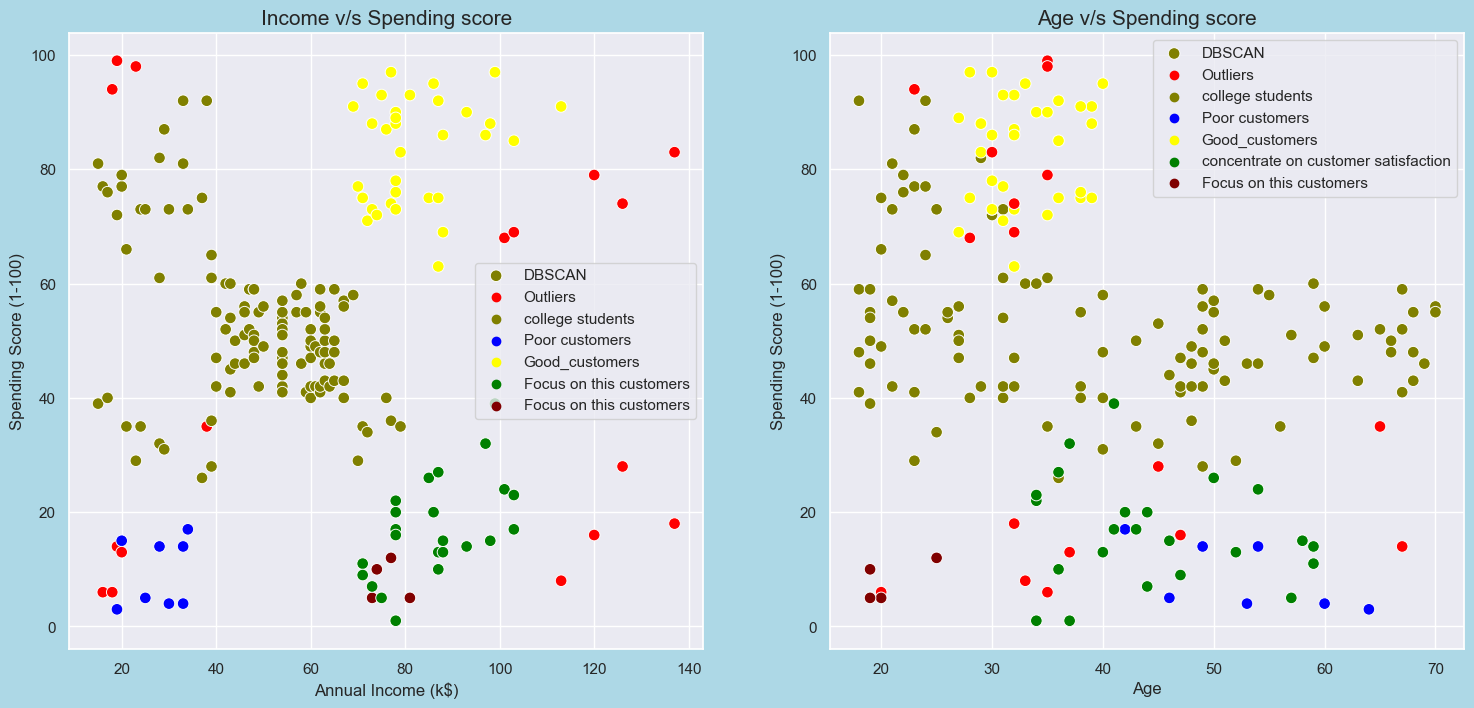

In [42]:
color2 = ["red", "olive", "blue", "Yellow", "green", "maroon"]
plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = C_df['Annual Income (k$)'], y = C_df['Spending Score (1-100)'], s = 70, hue =pred3, palette = color2)
plt.legend(labels = l3)
plt.title('Income v/s Spending score', fontsize = 15)

plt.subplot(1, 2, 2)
sns.scatterplot(x = C_df['Age'], y = C_df['Spending Score (1-100)'], s = 70, hue =pred3, palette = color2)
plt.legend(labels = a3)
plt.title('Age v/s Spending score', fontsize = 15)
plt.show()

In [43]:
silhouette_avg3 = silhouette_score(X, pred3)
silhouette_avg3

0.25510415502022404

In [46]:
a1 = pd.DataFrame({'Algorithms' : ['Kmeans', 'Agglomerative', 'DBSCAN'], 
                  'Silhouette score': [silhouette_avg1, silhouette_avg2, silhouette_avg3]})
a1

,Algorithms,Silhouette score
0,Kmeans,0.444067
1,Agglomerative,0.439975
2,DBSCAN,0.255104


### <div class="alert alert-info">Interpretation
**- From the above vizualization as well as the performace scores by silhouette score we can conclude that KMeans are giving better performance and the clusters in kmeans and hirarchical alogoritmns are approximatily  equal we can see it in the vizualization But based on the performace score we can take Kmeans as a best model**</div>

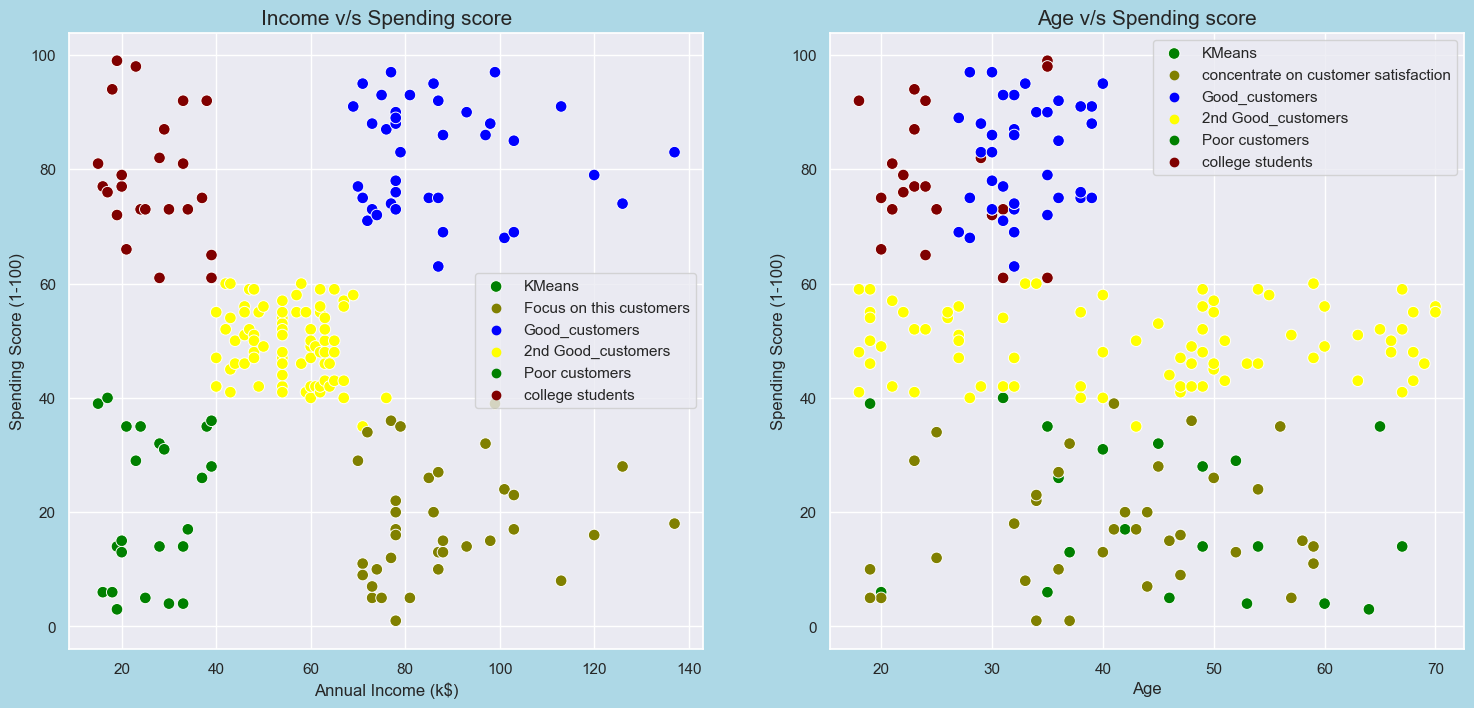

In [45]:
color1 = ["olive", "blue", "Yellow", "green", "maroon"]
plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = C_df['Annual Income (k$)'], y = C_df['Spending Score (1-100)'], s = 70, hue =pred1, palette = color1)
plt.legend(labels = l)
plt.title('Income v/s Spending score', fontsize = 15)

plt.subplot(1, 2, 2)
sns.scatterplot(x = C_df['Age'], y = C_df['Spending Score (1-100)'], s = 70, hue =pred1, palette = color1)
plt.legend(labels = a)
plt.title('Age v/s Spending score', fontsize = 15)
plt.show()

### <div class="alert alert-info">Conclusion
- **Cluster 1: High income / less spending score / high age**
    - **Need to focus on customer satisfaction to target on this customers**
- **Cluster 2: High income / High spending score / medium age**
    - **These are good customers who satisfied with the service**
- **Cluster 3: Average income / Average spending score / age is spreaded throughout**
    - **These are also good customers who satisfied with the service spending according to there income**
- **Cluster 4: Low income / Low spending score / medium age**
    - **These are spending less because of less income**
- **Cluster 5: Less income / High spendin score / young age**
    - **These are students so need to attract by friendly environment**
- **The Kmeans(With feature reduction) is giving good perfomance and good clusters**
- **The clusters are good to make decisions**